In [ ]:
!pip install quandl

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import quandl
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/drive/My Drive/stocks.xlsx",index_col = 0)
gdp_data = quandl.get("FRBP/NGDP_MN", authtoken="7ELtRGf5BbVskcsypD8W")
current_gdp = gdp_data.iloc[-1,-1]*1e9

In [ ]:
df_cap = df['marketCap'].copy()
df_cap.sort_values(ascending=False,inplace=True)


In [ ]:
df_cap.columns = ['marketCap']
number_of_companies = df_cap.cumsum().searchsorted(current_gdp) #number of companies reqd to reach US GDP

#How many companies can make up US GDP (by market cap)?

Text(0.5, 1.0, 'It takes 195 companies to reach current US GDP')

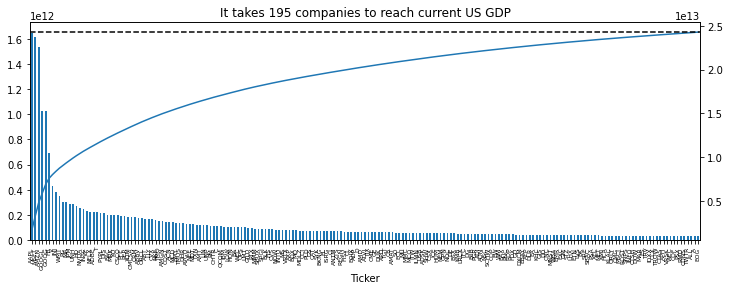

In [ ]:
ax1 = df_cap[:number_of_companies].plot.bar(figsize = (12,4))
ax2 = ax1.twinx()
ax1.tick_params(axis='x', which='major', labelsize=6)
ax1.tick_params(axis='x', which='minor', labelsize=6)
ax2.spines['right'].set_position(('axes', 1.0))
df_cap[:number_of_companies].cumsum().plot(ax=ax2)
ax2.axhline(current_gdp,color = 'k',ls = '--')
ax1.set_title('It takes {} companies to reach current US GDP'.format(number_of_companies))

#How large are the top 10 companies? 

In [ ]:
total = np.nansum(df_cap.values)
top = 10
topcap = np.nansum(df_cap[:10])
print('Top {} companies make up {:.2f}% of S%P500 market cap'.format(top,topcap/total*100))

Top 10 companies make up 31.56% of S%P500 market cap
